![image.png](https://i.imgur.com/a3uAqnb.png)

## **Goal:** Build a classification model to predict the rarity of pokemon cards (normal vs legendary).

# 1️⃣ Import Libraries

In [394]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import os
import kagglehub

from sklearn.model_selection import train_test_split, StratifiedKFold, cross_val_score
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score

import warnings
warnings.filterwarnings('ignore')

# 2️⃣ Load the Data

In [395]:
# Download dataset
path = kagglehub.dataset_download("rounakbanik/pokemon")
print("Path:", path)

Using Colab cache for faster access to the 'pokemon' dataset.
Path: /kaggle/input/pokemon


In [396]:
# TODO: Load the CSV file into df_pokemon


pokemon_path = os.path.join(path, 'pokemon.csv')
df = pd.read_csv(pokemon_path)
print(f"Shape: {df.shape}")
df.head()

Shape: (801, 41)


,abilities,against_bug,against_dark,against_dragon,against_electric,against_fairy,against_fight,against_fire,against_flying,against_ghost,...,percentage_male,pokedex_number,sp_attack,sp_defense,speed,type1,type2,weight_kg,generation,is_legendary
0,"['Overgrow', 'Chlorophyll']",1.0,1.0,1.0,0.5,0.5,0.5,2.0,2.0,1.0,...,88.1,1,65,65,45,grass,poison,6.9,1,0
1,"['Overgrow', 'Chlorophyll']",1.0,1.0,1.0,0.5,0.5,0.5,2.0,2.0,1.0,...,88.1,2,80,80,60,grass,poison,13.0,1,0
2,"['Overgrow', 'Chlorophyll']",1.0,1.0,1.0,0.5,0.5,0.5,2.0,2.0,1.0,...,88.1,3,122,120,80,grass,poison,100.0,1,0
3,"['Blaze', 'Solar Power']",0.5,1.0,1.0,1.0,0.5,1.0,0.5,1.0,1.0,...,88.1,4,60,50,65,fire,NaN,8.5,1,0
4,"['Blaze', 'Solar Power']",0.5,1.0,1.0,1.0,0.5,1.0,0.5,1.0,1.0,...,88.1,5,80,65,80,fire,NaN,19.0,1,0


# 3️⃣ EDA

In [397]:
# TODO: Check the data info and missing values
missing_value= df.isna().sum()
print(missing_value[missing_value > 0])

height_m            20
percentage_male     98
type2              384
weight_kg           20
dtype: int64


In [398]:
# TODO: Check for target imbalance
# Hint: the target column is 'is_legendary'
ti= df['is_legendary'].value_counts()
print(ti)


is_legendary
0    731
1     70
Name: count, dtype: int64


In [399]:
# TODO: Plot distribution of the stats (e.g., 'attack')
# YOUR CODE HERE

# 4️⃣ Data Cleaning

In [400]:
# Define stat columns
stat_cols = ['hp', 'attack', 'defense', 'sp_attack', 'sp_defense', 'speed']


# TODO: Drop rows with missing values (not encluding 'type2')
df_clean = df.dropna(subset=stat_cols)


In [401]:
# TODO: Fill missing type2
df_clean = df.copy()
df_clean['type2'] = df_clean['type2'].fillna('None')

# YOUR CODE HERE

# 5️⃣ Encode Categorical Variables

In [402]:
# TODO: Encode type1 and type2 using LabelEncoder
le = LabelEncoder()
df_clean['type1'] = le.fit_transform(df_clean['type1'])# YOUR CODE HERE
df_clean['type2'] =  le.fit_transform(df_clean['type2']) # YOUR CODE HERE



# 6️⃣ Feature Engineering

In [403]:
# TODO: Create total_stats feature (sum of all stat columns)
df_clean['total_stats'] = df_clean[stat_cols].sum(axis=1)


 # YOUR CODE HERE
print(df_clean[['total_stats']].head())
# TODO: Create attack_defense_ratio feature
df_clean['attack_defense_ratio'] = df['attack'] / df['defense'] * 100 # YOUR CODE HERE

   total_stats
0          318
1          405
2          625
3          309
4          405


# 7️⃣ Prepare Data

In [404]:
# Define features and target
feature_cols = stat_cols + ['total_stats', 'attack_defense_ratio', 'type1', 'type2']


X = df_clean[feature_cols]
y = df_clean['is_legendary']

# TODO: Split data with stratification (test_size=0.2, random_state=42)
# First split into train + temp (test+val)
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)



# YOUR CODE HERE

print(f"Train: {X_train.shape}, Test: {X_test.shape}")

Train: (640, 10), Test: (161, 10)


In [405]:
# TODO: Scale features using StandardScaler
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train_scaled) # YOUR CODE HERE

X_test_scaled = scaler.transform(X_test_scaled)# YOUR CODE HERE



# 8️⃣ Train Model
### Challenge : Try to get > 97% F1 score

In [406]:
# TODO: Train RandomForestClassifier with class_weight='balanced'
model = RandomForestClassifier(class_weight='balanced', random_state=42)

 # YOUR CODE HERE

F_model= model.fit(X_train_scaled,y_train )    # YOUR CODE HERE - fit the model

# 9️⃣ Evaluate Model

In [407]:
# TODO: Make predictions and print accuracy
y_pred = model.predict(X_test_scaled) #YOUR CODE HERE


print(f"Accuracy: {accuracy_score(y_test, y_pred):.4f}")
print(classification_report(y_test, y_pred, target_names=['Normal', 'Legendary']))

Accuracy: 0.9752
              precision    recall  f1-score   support

      Normal       0.97      1.00      0.99       147
   Legendary       1.00      0.71      0.83        14

    accuracy                           0.98       161
   macro avg       0.99      0.86      0.91       161
weighted avg       0.98      0.98      0.97       161



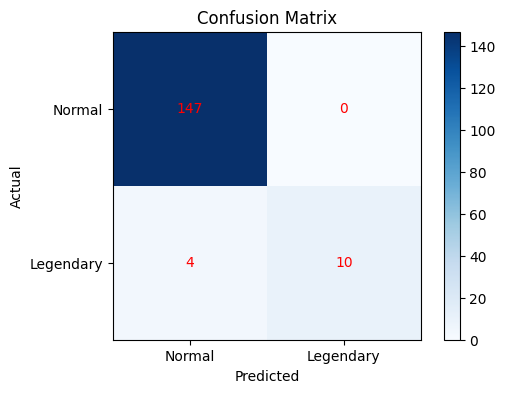

In [408]:
# TODO: Plot confusion matrix
cm = confusion_matrix(y_test, y_pred) # YOUR CODE HERE

plt.figure(figsize=(6, 4))
plt.imshow(cm, cmap='Blues')
plt.title('Confusion Matrix')
plt.colorbar()
plt.xticks([0, 1], ['Normal', 'Legendary'])
plt.yticks([0, 1], ['Normal', 'Legendary'])
for i in range(2):
    for j in range(2):
        plt.text(j, i, cm[i, j], ha='center', va='center', color='red')
plt.ylabel('Actual')
plt.xlabel('Predicted')
plt.show()